 **1. Import Data**

In [1070]:
#import necessary libraries
import pandas as pd
import numpy as np
import os

In [1071]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1072]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1073]:
!pip install statsmodels

In [1074]:
# Import libraries for model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [1186]:
os.chdir(R'C:\Shobha-Backup11th Dec\Upgrad Classes\NLP\Lead+Scoring+Case+Study\Lead Scoring Assignment')

In [1188]:
data =pd.read_csv('Leads.csv')

In [1190]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1192]:
data.shape

(9240, 37)

In [1194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1196]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1198]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**2. Data Cleaning**

**Handling Missing values**

In [1202]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1204]:
#Dropping columns having more than 40% null values
data = data.drop(columns=data.columns[(round(data.isnull().sum() / data.shape[0], 2)) > 0.40])

In [1206]:
# Check again
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Prospect ID                                       0.00
Do Not Call                                       0.00
Converted                                         0.00
Lead Origin                                       0.00
Total Time Spent on Website                       0.00
Do Not Email                                      0.00
Lead Numbe

In [1208]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**Convert Yes/No columns to 1/0 columns**

In [1211]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    data[feature] = data[feature].apply(lambda x : 1 if x=='Yes' else 0)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,Interested in other courses,0,0,Select,Select,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,Ringing,0,0,Select,Select,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,Ringing,0,0,Select,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,Will revert after reading the email,0,0,Select,Mumbai,0,0,Modified


**Impute the missing values of categorical columns**

In [1214]:
# Listing the categorical variables yet to be encoded
data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [1216]:
# Checking the labels of the remaining categorical columns

for col in data.iloc[:,1:].select_dtypes(include='object').columns:
    print(data[col].value_counts(normalize= True))

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
Pay per Click Ads    0.000109
blog                 0.000109
WeLearn              0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
testone              0.000109
NC_EDM               0.000109
Name: proportion, dtype: float64
Last Activity
Email Opened                    0.376163
SMS Sent                        0.300427
Olar

In [1218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1220]:
# Converting all the columnd containing selects to NaN as the user didnt select any option from the list.

data = data.replace('Select', np.nan)

In [1222]:
# For the city column we can impute the null values with Mumbai as it is a most frequently occuring city
data['City'] = data['City'].replace(np.nan, 'Mumbai')

# For the Specialization column we can categorise or create new role of nan values under the Other_Specialization category
data['Specialization'] = data['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column, more than 30 per cent data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 99 per cent data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# For current occupartion column, more than 85 per cent data is of "Unemployed" and hence it is safer to impute NULLS with this value
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

# For the country column, the most frequently occurning country is  "India" and hence it is safer to impute NULLS with this value
data['Country'] = data['Country'].replace(np.nan, 'India')

# For how did you hear about X_organization columns for the majority of the cases it is mentioned as select we can replace it with under Other_Sources
data['How did you hear about X Education'] = data['How did you hear about X Education'].replace(np.nan, 'Other_Sources')

# For Lead Profile column as the majoritry of the cases it is mentioned as select we can classify it under already existing 'Other Leads' group
data['Lead Profile'] = data['Lead Profile'].replace(np.nan, 'Other Leads')

In [1224]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [1226]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
data.dropna(inplace=True)

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,Interested in other courses,0,0,Other Leads,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,Ringing,0,0,Other Leads,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,Ringing,0,0,Other Leads,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,Will revert after reading the email,0,0,Other Leads,Mumbai,0,0,Modified


**3.Exploratory Data Analysis**

In [1229]:
# Check the target variable for the presence of any data imbalance
data['Converted'].value_counts(normalize=True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

There is good representation of both converted and non-converted class and there will not be any problem for the analysis

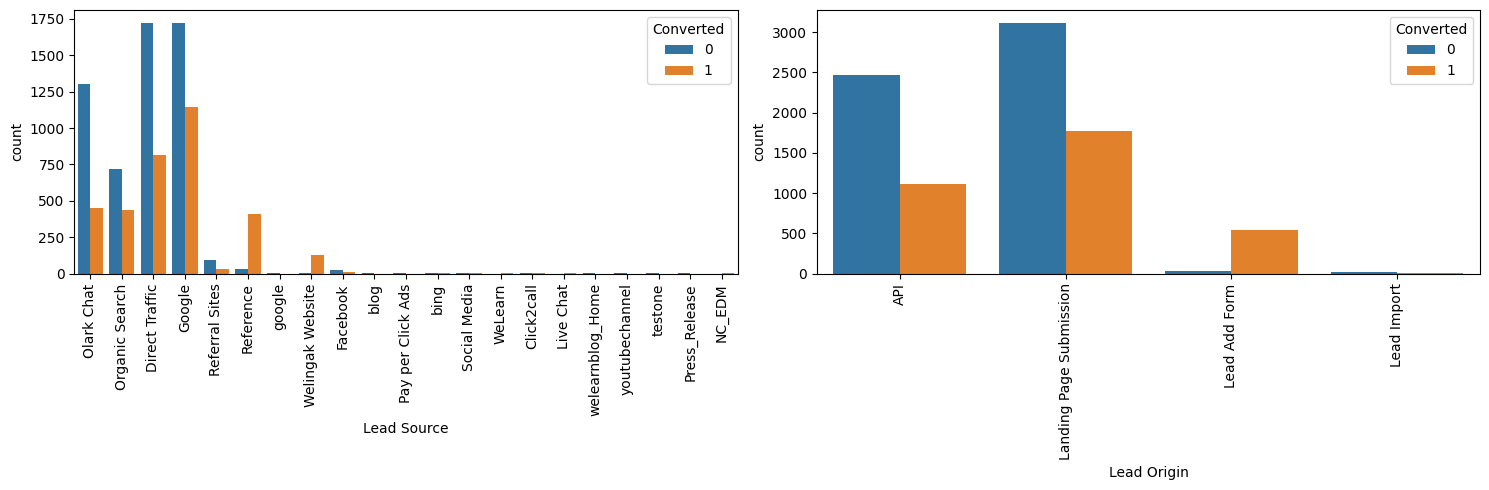

In [1232]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(x='Lead Source', hue='Converted', data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Lead Origin', hue='Converted', data=data)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

 OBSERVATION:

API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable
The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
Lead Import has very less count as well as conversion rate and hence can be ignored
To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'

In [1235]:
data['Lead Source'].value_counts(normalize=True)

Lead Source
Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Live Chat            0.000220
Social Media         0.000220
Press_Release        0.000220
Pay per Click Ads    0.000110
blog                 0.000110
WeLearn              0.000110
welearnblog_Home     0.000110
youtubechannel       0.000110
testone              0.000110
NC_EDM               0.000110
Name: proportion, dtype: float64

In [1237]:
# For column lead source group the negligible columns into separate other_lead_source category for better visualization and data analysis

data['Lead Source'] = data['Lead Source'].replace(['bing', 'Click2call', 'Live Chat', 'Social Media', 'Press_Release',
  'Pay per Click Ads', 'NC_EDM', 'testone', 'blog', 'WeLearn', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

data['Lead Source'] = data['Lead Source'].replace("google", 'Google')

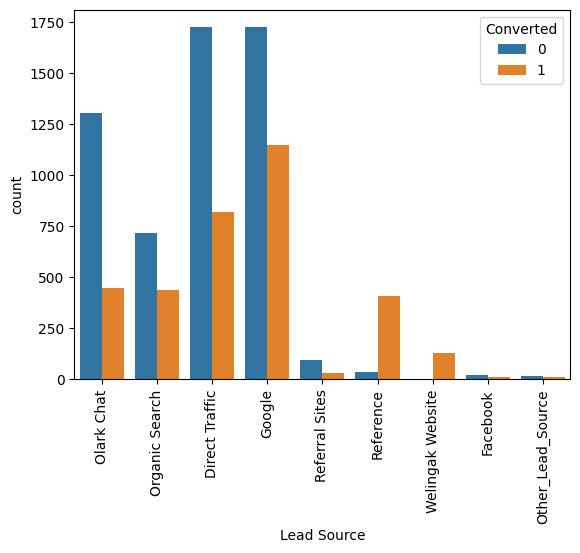

In [1239]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= data)
plt.xticks(rotation='vertical')
plt.show()

**Results**

The count of leads from Google is higher followed by direct traffic, Olark chat and organic search

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

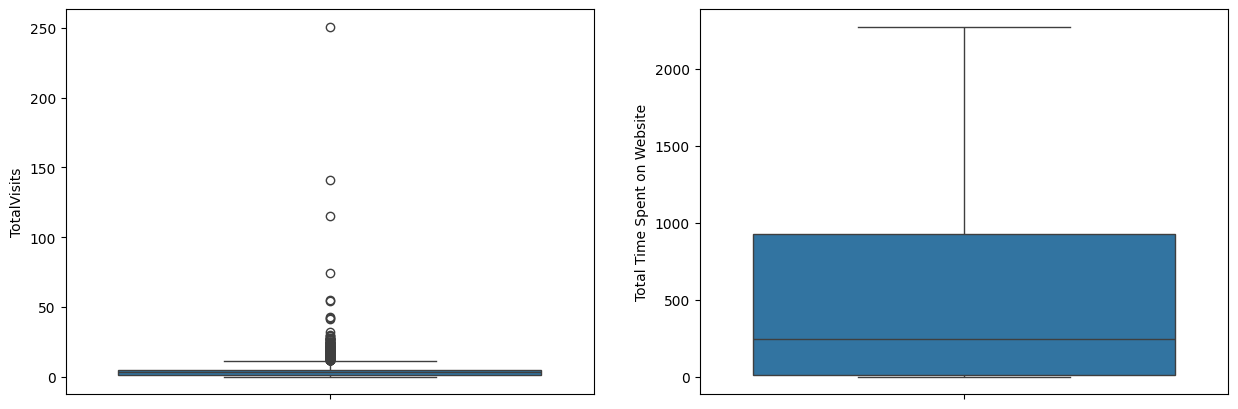

In [1243]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.boxplot(data['TotalVisits'])

plt.subplot(1,2,2)
sns.boxplot(data['Total Time Spent on Website'])

plt.show()

**Results**

There are extreme cases of outliers present in the TotalVisits column but the total time spent on the website column looks normal

In [1246]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

q1 = data["TotalVisits"].quantile(0.95)
data["TotalVisits"][data["TotalVisits"] >= q1] = q1

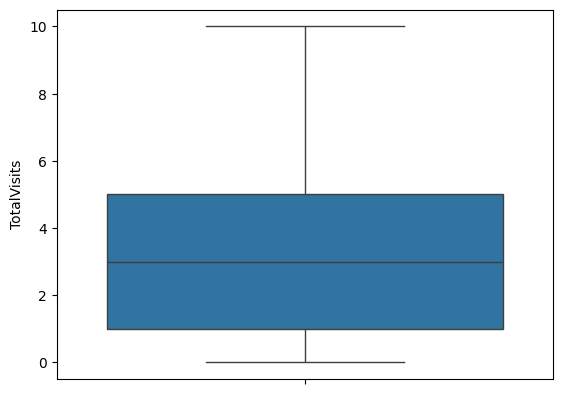

In [1248]:
#Recheck
sns.boxplot(data['TotalVisits'])
plt.show()

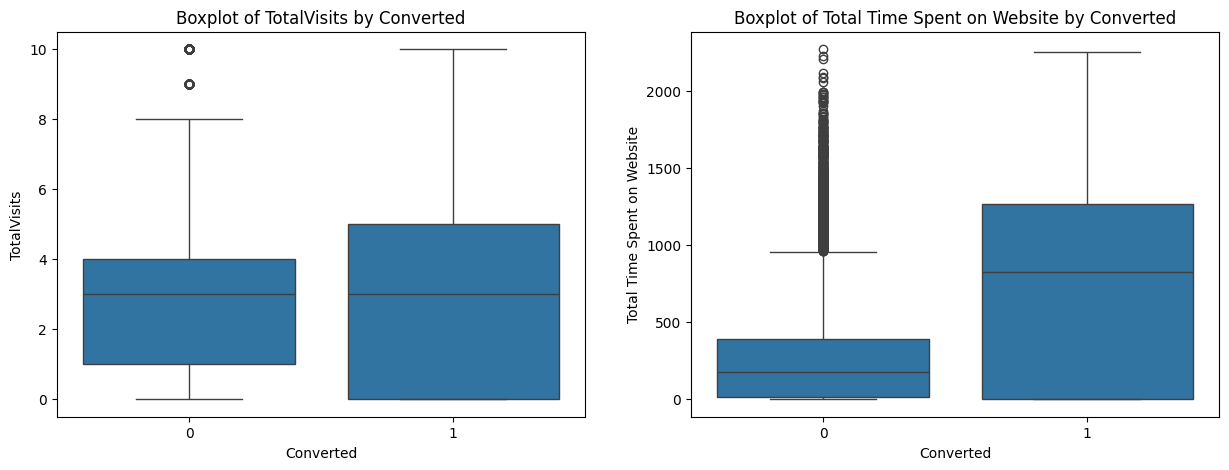

In [1250]:
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
sns.boxplot(x="Converted", y="TotalVisits", data=data)
plt.title("Boxplot of TotalVisits by Converted")

# Second boxplot: Total Time Spent on Website by Converted
plt.subplot(1, 2, 2)
sns.boxplot(x="Converted", y="Total Time Spent on Website", data=data)
plt.title("Boxplot of Total Time Spent on Website by Converted")
plt.show()

**OBSERVATION**

For the TotalVisits variable, the median values for both converted and non-converted users are similar. Hence, this variable does not provide conclusive insights regarding conversions.

For the Time Spent on Website variable, users who spend more time on the website are more likely to convert.

To improve conversions, the website can be made more engaging and appealing to encourage users to spend more time on it.

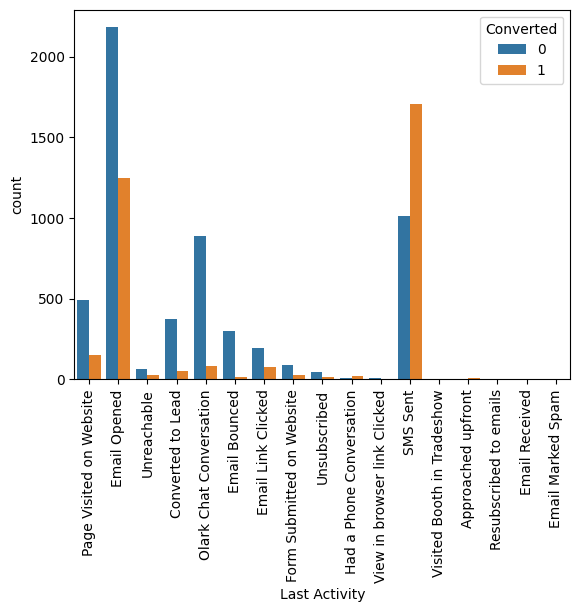

In [1253]:
# Check the Last Activity 

sns.countplot(x="Last Activity", hue="Converted", data= data)
plt.xticks(rotation='vertical')
plt.show()

In [1255]:
data['Last Activity'].value_counts(normalize=True)

Last Activity
Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Marked Spam               0.000220
Email Received                  0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: proportion, dtype: float64

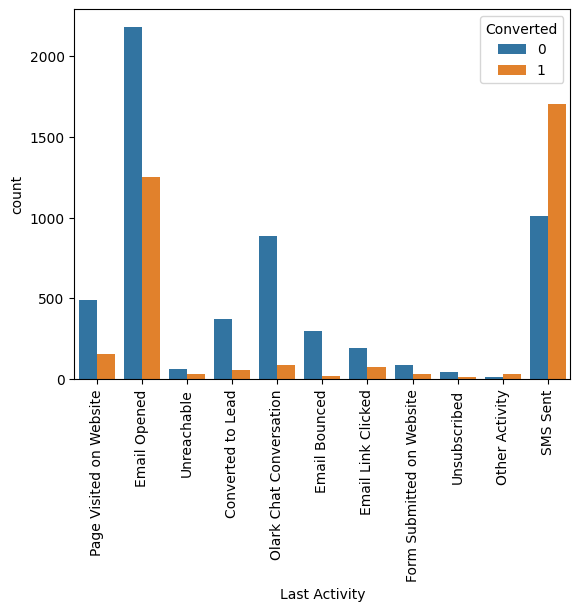

In [1257]:
# Convert negligible categories to the 'Others' category for better visualization and analysis
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= data)
plt.xticks( rotation='vertical')
plt.show()

**Inference:**

The majority of leads have "Email Opened" as their last activity.
The highest conversion rate is observed for leads whose last activity is "SMS Sent".
Recommendation:

Improve the conversion rate for leads with "Email Opened" as the last activity by initiating follow-up calls.
Additionally, increase the number of leads with "SMS Sent" as their last activity to leverage its high conversion potential.


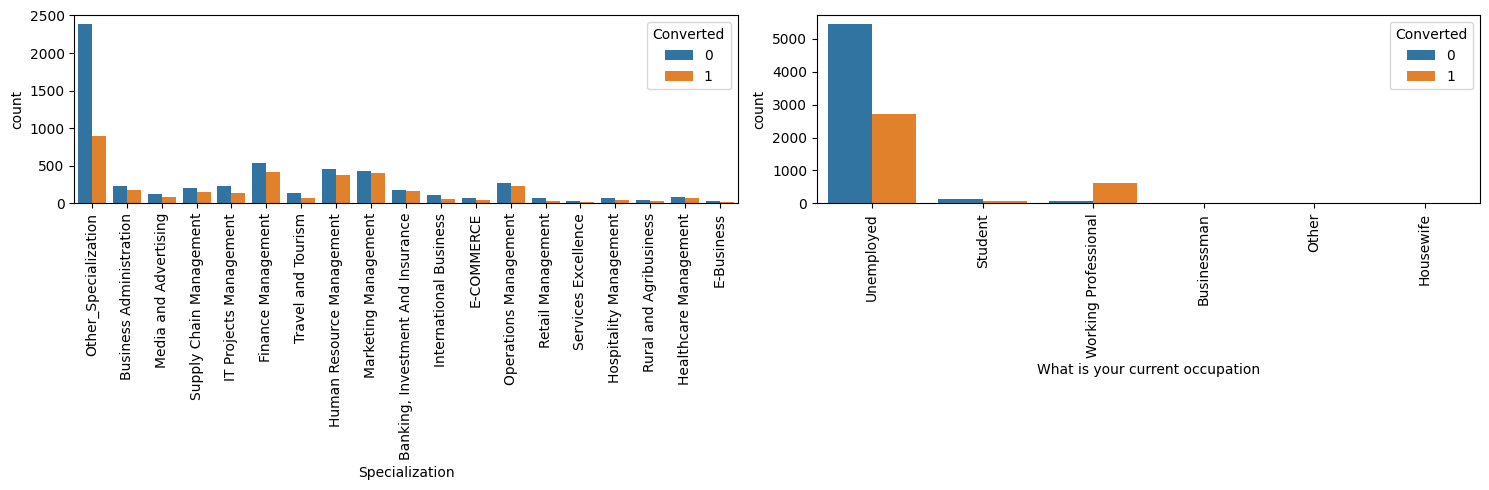

In [1260]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data=data)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Inferences:**

The plot above shows that no definitive conclusions can be drawn regarding Specialization.
It is evident that working professionals have the highest conversion rate.
Unemployed leads outnumber leads from any other category.

To boost the overall conversion rate, focus on increasing the number of working professional leads by reaching out through platforms like LinkedIn and other social media channels.
Additionally, efforts should be made to improve the conversion rate of unemployed leads.

In [1263]:
data['What is your current occupation'] = data['What is your current occupation'].replace("Other", 'Other_Occupation')

In [1265]:
data[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


**Inference:**

It is evident that the majority of values in all the columns are 0 (i.e., "No"), making it difficult to draw any meaningful conclusions from these columns.

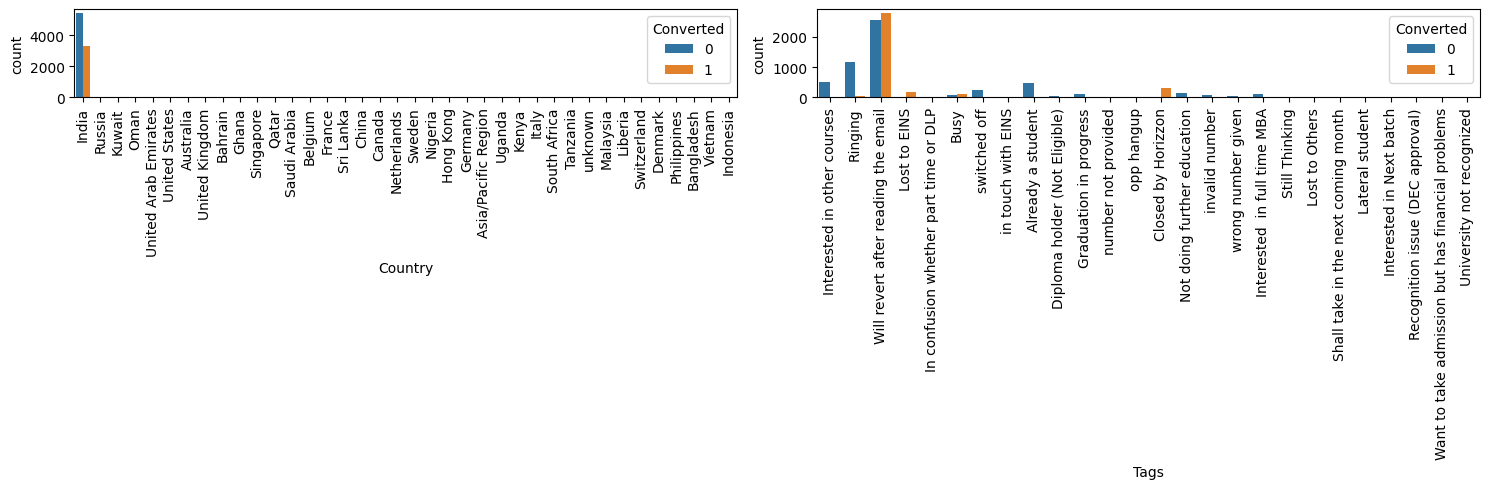

In [1268]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(x='Country', hue='Converted', data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Tags', hue='Converted', data=data)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Inferences**

Country, What matters most to you in choosing a course, City columns have most values corresponding to one value such as India for Country, Mumbai for city and hence there is no particular insights for these columns

In [1271]:
data['Tags'].value_counts(normalize=True)

Tags
Will revert after reading the email                  0.588825
Ringing                                              0.130813
Interested in other courses                          0.056094
Already a student                                    0.051245
Closed by Horizzon                                   0.033172
switched off                                         0.026449
Busy                                                 0.020388
Lost to EINS                                         0.018955
Not doing further education                          0.015980
Interested  in full time MBA                         0.012784
Graduation in progress                               0.012233
invalid number                                       0.009147
Diploma holder (Not Eligible)                        0.006943
wrong number given                                   0.005180
opp hangup                                           0.003637
number not provided                                  0.002755
in 

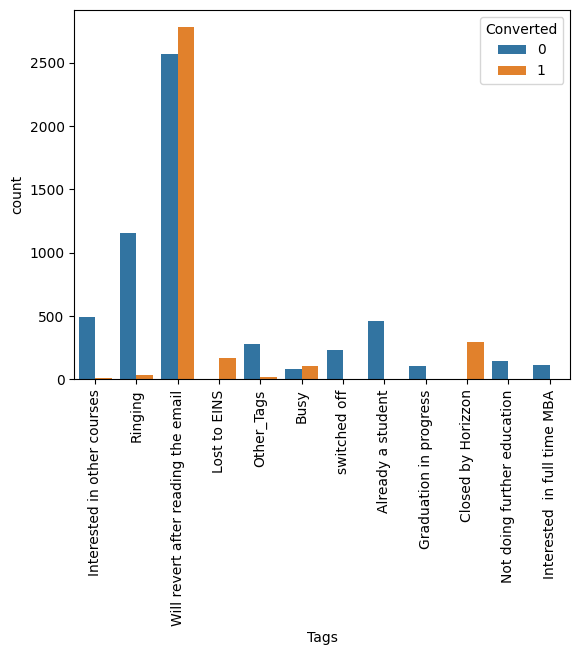

In [1273]:
# Converting all low count categories to Others category
data['Tags']= data['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided',                                 
                                     'in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking',
                                     'In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month',
                                     'University not recognized','Recognition issue (DEC approval)' ], 'Other_Tags')

# lets plot the Tags again
sns.countplot(x='Tags', hue='Converted', data=data)
plt.xticks( rotation='vertical')
plt.show()

**Inference:**
'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

Summary:

1.To enhance the overall lead conversion rate, we should prioritize improving the conversion rates of leads from 'API' and 'Landing Page Submission' as Lead Origins, while also increasing the number of leads from the 'Lead Add Form'.

2.To boost conversion rates, we need to focus on improving the performance of leads from 'Google', 'Olark Chat', 'Organic Search', and 'Direct Traffic', while also increasing the volume of leads from 'Reference' and 'Welingak Website'.

3.Making the website more engaging can help increase the time users spend on it, which may in turn improve conversions.

4.We should focus on improving the conversion rate of leads with "Email Opened" as their last activity by following up with them through calls, while also working to increase the number of leads with "SMS Sent" as their last activity.

5.To increase the overall conversion rate, we should target more Working Professional leads by engaging with them on professional platforms like LinkedIn, and also work on boosting the conversion rate of Unemployed leads.

6.We observed that several columns contain only a single value. Since these columns provide no meaningful insights, they can be removed from further analysis.

In [1277]:
# Drop the unnecessary columns

data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call','Lead Profile'],axis=1)

data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Other_Sources,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Other_Sources,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Other_Sources,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Other,Unemployed,Will revert after reading the email,Mumbai,Modified


In [1279]:
data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Tags', 'City', 'Last Notable Activity'],
      dtype='object')

In [1281]:
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation',
                             'How did you hear about X Education','Tags','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [1283]:
data = pd.concat([data, dummy], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,...,False,False,True,False,False,False,False,False,False,False


In [1285]:
varlist=['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other_Lead_Source', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Other_Specialization',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_Multiple Sources',
       'How did you hear about X Education_Online Search',
       'How did you hear about X Education_Other',
       'How did you hear about X Education_Other_Sources',
       'How did you hear about X Education_SMS',
       'How did you hear about X Education_Social Media',
       'How did you hear about X Education_Student of SomeSchool',
       'How did you hear about X Education_Word Of Mouth', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked']

data[varlist] = data[varlist].astype(int)

In [1287]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,...,0,0,1,0,0,0,0,0,0,0


In [1289]:
#drop the original variable after creating dummies
data=data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'How did you hear about X Education','Tags','City','Last Notable Activity','Prospect ID'], axis=1)

In [1291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 89 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Do Not Email                                              9074 non-null   int64  
 1   Converted                                                 9074 non-null   int64  
 2   TotalVisits                                               9074 non-null   float64
 3   Total Time Spent on Website                               9074 non-null   int64  
 4   Page Views Per Visit                                      9074 non-null   float64
 5   Lead Origin_Landing Page Submission                       9074 non-null   int64  
 6   Lead Origin_Lead Add Form                                 9074 non-null   int64  
 7   Lead Origin_Lead Import                                   9074 non-null   int64  
 8   Lead Source_Facebook   

**4.Train_Test_Split**

In [1294]:
# Putting all the feature variables to X
X = data.drop(['Converted'], axis=1)
# Putting target variable to y
y = data['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [1296]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**5.Feature Scaling**

In [1299]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1301]:
#Checking the Conversion Rate

print("Conversion rate is ", (sum(data['Converted'])/len(data['Converted'].index))*100)

Conversion rate is  37.85541106458012


**5.Find the correlation**

In [1304]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = data.corr()

In [1306]:
# Compute the correlation matrix
conv_corr = data.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones(conv_corr.shape), k=1).astype(bool)

# Stack and sort the correlations
top_correlations = conv_corr.where(mask).stack().sort_values(ascending=False).head(10)

# Display the top correlations
print(top_correlations)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.737996
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.594369
dtype: float64


In [1308]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)

In [1310]:
conv_corr = X_train.corr()

In [1312]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form     Lead Source_Reference                             0.859537
TotalVisits                   Page Views Per Visit                              0.756104
Do Not Email                  Last Activity_Email Bounced                       0.624939
Last Activity_Other Activity  Last Notable Activity_Had a Phone Conversation    0.593057
Lead Source_Olark Chat        Specialization_Other_Specialization               0.505771
Page Views Per Visit          Lead Origin_Landing Page Submission               0.493007
Lead Origin_Lead Add Form     Lead Source_Welingak Website                      0.468225
Last Activity_Email Bounced   Last Notable Activity_Email Bounced               0.450911
TotalVisits                   Lead Origin_Landing Page Submission               0.447765
Lead Source_Olark Chat        Last Activity_Olark Chat Conversation             0.419173
dtype: float64

**6.Model Building**

In [1315]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           81
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1590.9
Date:                Sun, 15 Dec 2024   Deviance:                       3181.7
Time:                        10:56:20   Pearson chi2:                 1.16e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5649
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -2.1501      1.888     -1.139      0.255      -5.850       1.550
Do Not Email                                                -1.6494      0.285     -5.780      0.000      -2.209      -1.090
TotalVisits                                                  0.0154      0.075      0.203      0.839      -0.133       0.163
Total Time Spent on Website                                  1.1961      0.057     21.062      0.000       1.085       1.307
Page Views Per Visit                                        -0.0836      0.075     -1.111      0.266      -0.231       0.064
Lead Origin_Landing Page Submission                         -1.3228      0.197     -6.709      0.000      -1.709      -0.936
Lead Origin_Lead Add Form                                    0.5971      1.312      0.455      0.649      -1.974       3.168
Lead Origin_Lead Import                                      1.2814      0.650      1.973      0.049       0.008       2.555
Lead Source_Google                                           0.1263      0.165      0.766      0.444      -0.197       0.449
Lead Source_Olark Chat                                       0.8833      0.220      4.014      0.000       0.452       1.315
Lead Source_Organic Search                                   0.2405      0.178      1.354      0.176      -0.108       0.589
Lead Source_Other_Lead_Source                                0.4676      0.816      0.573      0.566      -1.131       2.066
Lead Source_Reference                                        2.3073      1.354      1.704      0.088      -0.347       4.962
Lead Source_Referral Sites                                  -0.0156      0.431     -0.036      0.971      -0.861       0.829
Lead Source_Welingak Website                                 4.3267      1.510      2.866      0.004       1.368       7.286
Last Activity_Email Bounced                                 -0.7920      0.823     -0.962      0.336      -2.406       0.822
Last Activity_Email Link Clicked                            -0.8154      0.403     -2.023      0.043      -1.605      -0.026
Last Activity_Email Opened                                  -0.4370      0.299     -1.460      0.144      -1.024       0.150
Last Activity_Form Submitted on Website                      0.0888      0.535      0.166      0.868      -0.960       1.137
Last Activity_Olark Chat Conversation                       -0.5429      0.344     -1.580      0.114      -1.216       0.130
Last Activity_Other Activity                                 1.3394      1.048      1.278      0.201      -0.715       3.394
Last Activity_Page Visited on Website                       -0.5456      0.347     

**7. Feature selection**

In [1319]:
#Starting with 15 features selected by RFE
#We will then optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', np.True_, np.int64(1)),
 ('TotalVisits', np.False_, np.int64(62)),
 ('Total Time Spent on Website', np.False_, np.int64(5)),
 ('Page Views Per Visit', np.False_, np.int64(56)),
 ('Lead Origin_Landing Page Submission', np.True_, np.int64(1)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Lead Import', np.False_, np.int64(11)),
 ('Lead Source_Google', np.False_, np.int64(47)),
 ('Lead Source_Olark Chat', np.False_, np.int64(12)),
 ('Lead Source_Organic Search', np.False_, np.int64(42)),
 ('Lead Source_Other_Lead_Source', np.False_, np.int64(52)),
 ('Lead Source_Reference', np.False_, np.int64(15)),
 ('Lead Source_Referral Sites', np.False_, np.int64(58)),
 ('Lead Source_Welingak Website', np.True_, np.int64(1)),
 ('Last Activity_Email Bounced', np.False_, np.int64(29)),
 ('Last Activity_Email Link Clicked', np.False_, np.int64(23)),
 ('Last Activity_Email Opened', np.False_, np.int64(27)),
 ('Last Activity_Form Submitted on Website', np.False_, n

In [1321]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3338  567]
 [ 385 2061]]
Accuracy : 0.8501023460872303
Sensitivity : 0.8426001635322976
Specificity : 0.8548015364916773
Precision : 0.7842465753424658


(0.8501023460872303,
 np.float64(0.8426001635322976),
 np.float64(0.8548015364916773),
 np.float64(0.7842465753424658))

In [1323]:
col = X_train.columns[rfe.support_]

In [1325]:
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

**Logistic model after feature selection**

In [1328]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1920.4
Date:                Sun, 15 Dec 2024   Deviance:                       3840.8
Time:                        10:57:25   Pearson chi2:                 1.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5173
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2910      0.252     -1.157      0.247      -0.784       0.202
Do Not Email                                     -1.5862      0.212     -7.471      0.000      -2.002      -1.170
Lead Origin_Landing Page Submission              -1.5251      0.154     -9.885      0.000      -1.828      -1.223
Lead Origin_Lead Add Form                         1.4248      0.316      4.505      0.000       0.805       2.045
Lead Source_Welingak Website                      2.3599      0.796      2.966      0.003       0.801       3.919
Last Activity_Other Activity                      2.2335      0.603      3.701      0.000       1.051       3.416
Last Activity_SMS Sent                            1.9867      0.092     21.499      0.000       1.806       2.168
Last Activity_Unsubscribed                        2.1409      0.548      3.906      0.000       1.067       3.215
Specialization_Other_Specialization              -1.9182      0.156    -12.281      0.000      -2.224      -1.612
What is your current occupation_Unemployed       -2.5455      0.201    -12.684      0.000      -2.939      -2.152
Tags_Busy                                         3.5573      0.259     13.759      0.000       3.051       4.064
Tags_Closed by Horizzon                           9.4653      0.738     12.829      0.000       8.019      10.911
Tags_Lost to EINS                                 9.3765      0.746     12.574      0.000       7.915      10.838
Tags_Will revert after reading the email          4.1995      0.155     27.099      0.000       3.896       4.503
Last Notable Activity_Modified                   -1.6373      0.096    -17.086      0.000      -1.825      -1.449
Last Notable Activity_Olark Chat Conversation    -1.5066      0.328     -4.590      0.000      -2.150      -0.863
=================================================================================================================
"""

In [1330]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.459544
1012    0.245812
9226    0.012063
4750    0.861103
7987    0.995340
1281    0.861103
2880    0.459544
4971    0.937463
7536    0.459544
1248    0.017770
dtype: float64

In [1332]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45954441, 0.24581164, 0.01206343, 0.86110342, 0.99534049,
       0.86110342, 0.45954441, 0.93746273, 0.45954441, 0.01777019])

In [1334]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.459544,3009
1,0,0.245812,1012
2,0,0.012063,9226
3,1,0.861103,4750
4,1,0.995340,7987


In [1336]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.459544,3009,0
1,0,0.245812,1012,0
2,0,0.012063,9226,0
3,1,0.861103,4750,1
4,1,0.995340,7987,1


In [1338]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8638009762242167


**Find VIF values**

In [1341]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
8      What is your current occupation_Unemployed                       6.93
1             Lead Origin_Landing Page Submission                       4.32
7             Specialization_Other_Specialization                       3.51
12       Tags_Will revert after reading the email                       2.50
13                 Last Notable Activity_Modified                       1.73
2                       Lead Origin_Lead Add Form                       1.66
5                          Last Activity_SMS Sent                       1.59
3                    Lead Source_Welingak Website                       1.34
10                        Tags_Closed by Horizzon                       1.21
0                                    Do Not Email                       1.20
6                      Last Activity_Unsubscribed                       1.08
9                                       Tags_Busy                       1.08

**Inference**

All variables have low p-values, but 'What is your current occupation_Unemployed' has a high VIF value. Therefore, it should be removed from the analysis.

In [1344]:
col = col.drop('What is your current occupation_Unemployed')
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other_Specialization',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [1346]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.7
Date:                Sun, 15 Dec 2024   Deviance:                       4051.3
Time:                        10:57:36   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5010
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.4546      0.193    -12.745      0.000      -2.832      -2.077
Do Not Email                                     -1.5558      0.203     -7.672      0.000      -1.953      -1.158
Lead Origin_Landing Page Submission              -1.6117      0.151    -10.683      0.000      -1.907      -1.316
Lead Origin_Lead Add Form                         1.5833      0.315      5.034      0.000       0.967       2.200
Lead Source_Welingak Website                      2.1487      0.795      2.704      0.007       0.591       3.706
Last Activity_Other Activity                      2.4096      0.602      4.001      0.000       1.229       3.590
Last Activity_SMS Sent                            1.9109      0.089     21.376      0.000       1.736       2.086
Last Activity_Unsubscribed                        2.0761      0.520      3.989      0.000       1.056       3.096
Specialization_Other_Specialization              -2.1929      0.154    -14.257      0.000      -2.494      -1.891
Tags_Busy                                         3.3535      0.255     13.176      0.000       2.855       3.852
Tags_Closed by Horizzon                           9.3350      0.735     12.696      0.000       7.894      10.776
Tags_Lost to EINS                                 9.2079      0.742     12.406      0.000       7.753      10.663
Tags_Will revert after reading the email          4.1573      0.151     27.549      0.000       3.862       4.453
Last Notable Activity_Modified                   -1.6376      0.093    -17.560      0.000      -1.820      -1.455
Last Notable Activity_Olark Chat Conversation    -1.5503      0.326     -4.755      0.000      -2.189      -0.911
=================================================================================================================
"""

In [1348]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.522745,3009,1
1,0,0.025145,1012,0
2,0,0.012442,9226,0
3,1,0.881004,4750,1
4,1,0.995570,7987,1


In [1350]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8501023460872303


**Check the VIF once again**

In [1353]:
calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
11       Tags_Will revert after reading the email                       2.40
1             Lead Origin_Landing Page Submission                       2.19
7             Specialization_Other_Specialization                       2.01
12                 Last Notable Activity_Modified                       1.67
2                       Lead Origin_Lead Add Form                       1.64
5                          Last Activity_SMS Sent                       1.58
3                    Lead Source_Welingak Website                       1.34
9                         Tags_Closed by Horizzon                       1.21
0                                    Do Not Email                       1.20
6                      Last Activity_Unsubscribed                       1.08
13  Last Notable Activity_Olark Chat Conversation                       1.07
8                                       Tags_Busy                       1.07

**Inference:**
  
All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

In [1356]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [1358]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3338  567]
 [ 385 2061]]
Accuracy : 0.8501023460872303
Sensitivity : 0.8426001635322976
Specificity : 0.8548015364916773
Precision : 0.7842465753424658


(0.8501023460872303,
 np.float64(0.8426001635322976),
 np.float64(0.8548015364916773),
 np.float64(0.7842465753424658))

**8.Plotting the ROC Curve**

In [1362]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1364]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

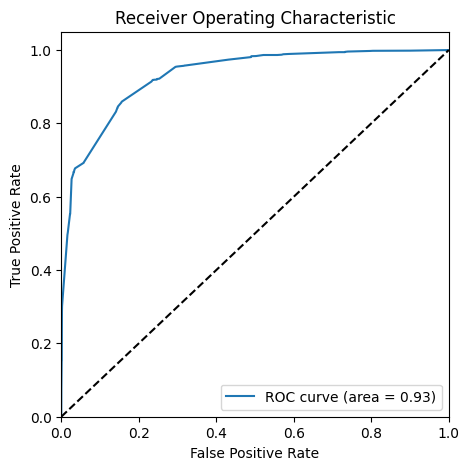

In [1366]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

**9.Find the optimal value of cutoff**

In [1369]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.522745,3009,1,1,1,1,1,1,1,0,0,0,0
1,0,0.025145,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.012442,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.881004,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.995570,7987,1,1,1,1,1,1,1,1,1,1,1


In [1371]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.691702,0.980785,0.510627,0.556613
0.2,0.2,0.817352,0.919460,0.753393,0.700187
0.3,0.3,0.823492,0.918643,0.763892,0.709056
0.4,0.4,0.849787,0.857727,0.844814,0.775888
0.5,0.5,0.850102,0.842600,0.854802,0.784247
0.6,0.6,0.853881,0.677433,0.964405,0.922606
0.7,0.7,0.852307,0.668029,0.967734,0.928409
0.8,0.8,0.847741,0.647179,0.973367,0.938352
0.9,0.9,0.728862,0.299264,0.997951,0.989189


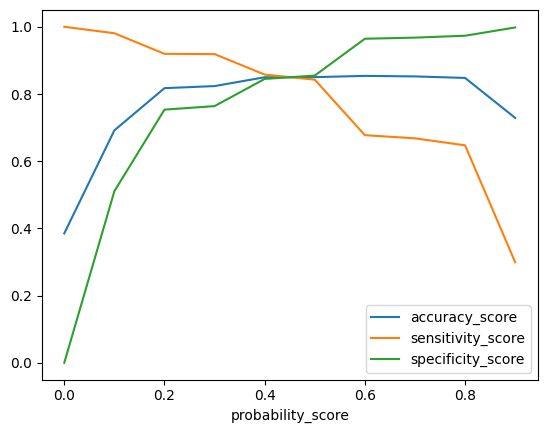

In [1373]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

**Precision Recall Tradeoff**

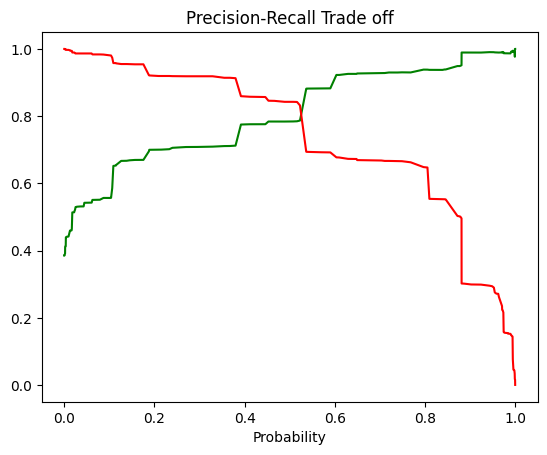

In [1376]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

**Inference:**

In Sensitivity-Specificity-Accuracy plot 0.42 probability looks optimal. In Precision-Recall Curve 0.5 looks optimal.

We are taking 0.42 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [1379]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.522745,3009,1,52
1,0,0.025145,1012,0,3
2,0,0.012442,9226,0,1
3,1,0.881004,4750,1,88
4,1,0.995570,7987,1,100


In [1381]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[2980  925]
 [ 199 2247]]
Accuracy : 0.8230199968508897
Sensitivity : 0.9186426819296811
Specificity : 0.7631241997439181
Precision : 0.7083858764186634


(0.8230199968508897,
 np.float64(0.9186426819296811),
 np.float64(0.7631241997439181),
 np.float64(0.7083858764186634))

In [1383]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.379856,1,38
1,1,1490,0.522745,1,52
2,0,7936,0.379856,1,38
3,1,4216,0.998916,1,100
4,0,3830,0.522745,1,52


In [1385]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1280  454]
 [  90  899]]
Accuracy : 0.8002203452074917
Sensitivity : 0.9089989888776542
Specificity : 0.7381776239907728
Precision : 0.6644493717664449


(0.8002203452074917,
 np.float64(0.9089989888776542),
 np.float64(0.7381776239907728),
 np.float64(0.6644493717664449))

In [1391]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print('---Result of training data---')
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print('---Result of training data---')
    print(y_test_pred_final.head())
    
    print('---Model Evaluation Metrics---')
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [1395]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.42)

---Result of training data---
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.522745                  1          52
1         1012          0             0.025145                  0           3
2         9226          0             0.012442                  0           1
3         4750          1             0.881004                  1          88
4         7987          1             0.995570                  1         100
---Result of training data---
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.379856                  0          38
1         1490          1             0.522745                  1          52
2         7936          0             0.379856                  0          38
3         4216          1             0.998916                  1         100
4         3830          0             0.522745                  1          52
---M

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.379856,0,38
1,1490,1,0.522745,1,52
2,7936,0,0.379856,0,38
3,4216,1,0.998916,1,100
4,3830,0,0.522745,1,52
...,...,...,...,...,...
2718,850,0,0.175578,0,18
2719,2879,0,0.003322,0,0
2720,6501,1,0.881004,1,88
2721,7155,0,0.175578,0,18


In [1397]:
print("Features used in Final Model :", col)

print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other_Specialization',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
const                                           -2.454629
Do Not Email                                    -1.555791
Lead Origin_Landing Page Submission             -1.611658
Lead Origin_Lead Add Form                        1.583328
Lead Source_Welingak Website                     2.148682
Last Activity_Other Activity                     2.409595
Last Activity_SMS Sent                           1.910934
Last Activity_Unsubscribed                       2.07

**Final Results and Conclusion**

1.The logistic regression model predicts the probability of the target variable taking a certain value, rather than predicting the value of the target 
variable directly. A cutoff probability is then applied to determine the final predicted value.

2.In this analysis, the logistic regression model is used to predict the probability of customer conversion.

3.The optimum cutoff probability is determined to be 0.42. Leads with a probability greater than 0.42 are classified as Hot Leads (customers likely 
to convert), while those with a probability of 0.42 or less are classified as Cold Leads (customers unlikely to convert).

4.The final logistic regression model is built using 14 features.

5.The features included in the final model are:
['Do Not Email', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
'Last Activity_Other Activity', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'Specialization_Other_Specialization',
'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Will revert after reading the email',
'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation'].

6.The top three categorical/dummy variables in the final model, based on the absolute values of their coefficient factors, are:

-'Tags_Closed by Horizzon'
-'Tags_Lost to EINS'
-'Tags_Will revert after reading the email'.


‘Tags_Closed by Horizzon’, 'Tags_Lost to EINS' and 'Tags_Will revert after reading the email'are obtained by encoding original categorical variable 
‘Tags’.

Tags_Closed by Horizzon (Coefficient factor = 9.334976)

Tags_Lost to EINS (Coefficient factor = 9.207855)

Tags_Will revert after reading the email (Coefficient factor =4.157329)

The final model has Sensitivity of 0.836, this means the model is able to predict 83.6% customers out of all the converted customers, 
(Positive conversion) correctly.

The final model has Precision of 0.74, this means 74% of predicted hot leads are True Hot Leads.


**Subjective Questions**

3.X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted 
to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers
who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good 
strategy they should employ at this stage.

In [1406]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.1)

---Result of training data---
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.522745                  1          52
1         1012          0             0.025145                  0           3
2         9226          0             0.012442                  0           1
3         4750          1             0.881004                  1          88
4         7987          1             0.995570                  1         100
---Result of training data---
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.379856                  1          38
1         1490          1             0.522745                  1          52
2         7936          0             0.379856                  1          38
3         4216          1             0.998916                  1         100
4         3830          0             0.522745                  1          52
---M

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.379856,1,38
1,1490,1,0.522745,1,52
2,7936,0,0.379856,1,38
3,4216,1,0.998916,1,100
4,3830,0,0.522745,1,52
...,...,...,...,...,...
2718,850,0,0.175578,1,18
2719,2879,0,0.003322,0,0
2720,6501,1,0.881004,1,88
2721,7155,0,0.175578,1,18


**Subjective Question**
  
4.Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on 
some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize 
the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [1410]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)

---Result of training data---
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.522745                  0          52
1         1012          0             0.025145                  0           3
2         9226          0             0.012442                  0           1
3         4750          1             0.881004                  0          88
4         7987          1             0.995570                  1         100
---Result of training data---
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.379856                  0          38
1         1490          1             0.522745                  0          52
2         7936          0             0.379856                  0          38
3         4216          1             0.998916                  1         100
4         3830          0             0.522745                  0          52
---M

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.379856,0,38
1,1490,1,0.522745,0,52
2,7936,0,0.379856,0,38
3,4216,1,0.998916,1,100
4,3830,0,0.522745,0,52
...,...,...,...,...,...
2718,850,0,0.175578,0,18
2719,2879,0,0.003322,0,0
2720,6501,1,0.881004,0,88
2721,7155,0,0.175578,0,18
